In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,id,credit_score,state,gender,age,tenure,balance,no_of_products,credit_card,active,estimated_salary,churn
0,269976851321,686,Mumbai,Male,32,6,0.00,2,1,1,179093.26,0
1,685873070169,632,New Delhi,Male,42,4,119624.60,2,1,1,195978.86,0
2,461791082404,559,Bangalore,Male,24,3,114739.92,1,1,0,85891.02,1
3,674358499391,561,Mumbai,Female,27,9,135637.00,1,1,0,143080.40,1
4,440085432991,517,Mumbai,Male,56,9,142147.32,1,0,0,39488.04,1


In [84]:
train_df.isnull().sum()

id                  0
credit_score        0
state               0
gender              0
age                 0
tenure              0
balance             0
no_of_products      0
credit_card         0
active              0
estimated_salary    0
churn               0
dtype: int64

In [85]:
train_df['gender'].value_counts()

gender
Male      4362
Female    3638
Name: count, dtype: int64

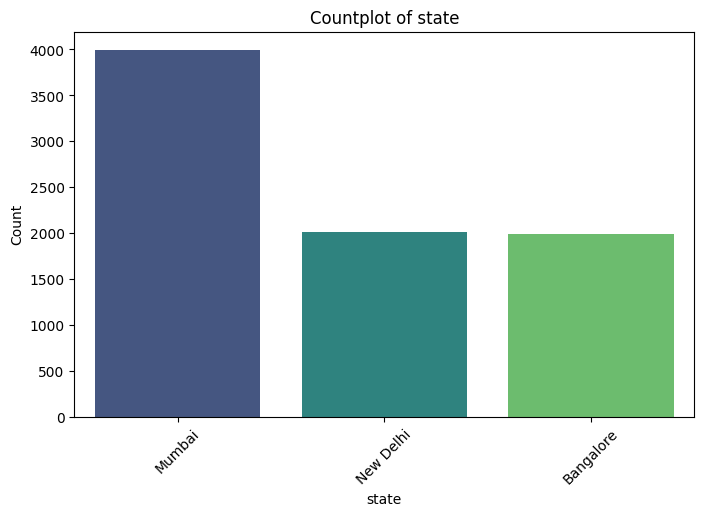

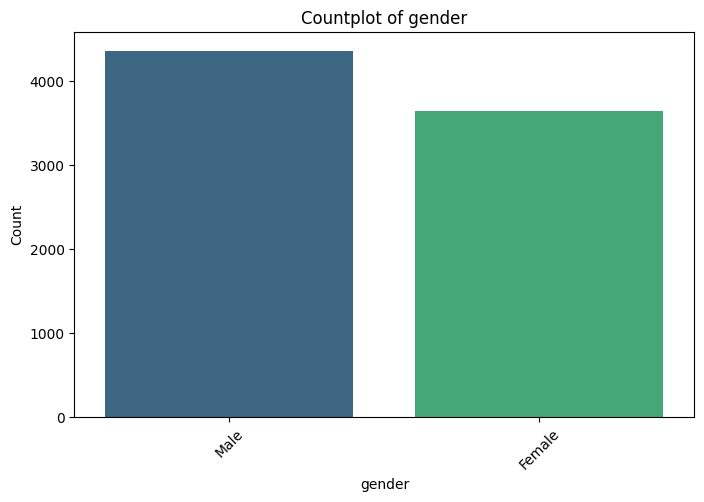

In [86]:
categorical_columns = train_df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

Text(0.5, 1.0, 'Gender Distribution')

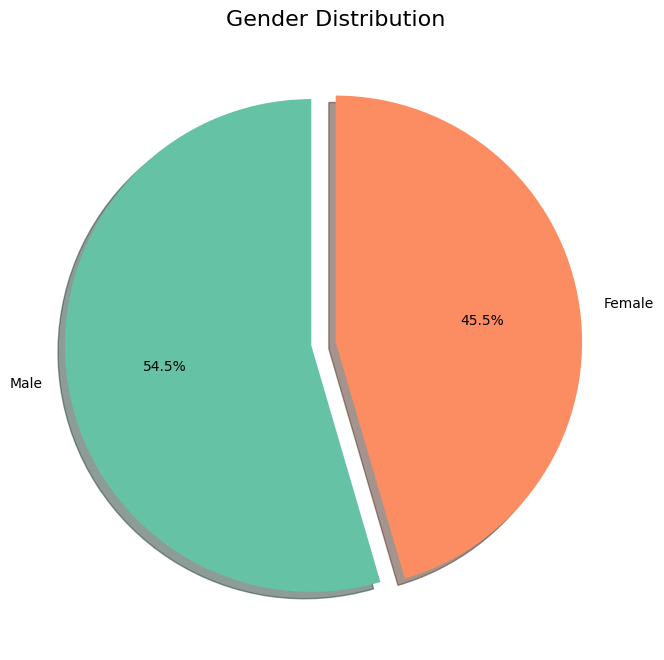

In [90]:
from mpl_toolkits.mplot3d import Axes3D
gender_counts = train_df['gender'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(gender_counts))

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.1, 0),  
    shadow=True,
    textprops={'color': 'black'}
)

plt.title('Gender Distribution', fontsize=16)

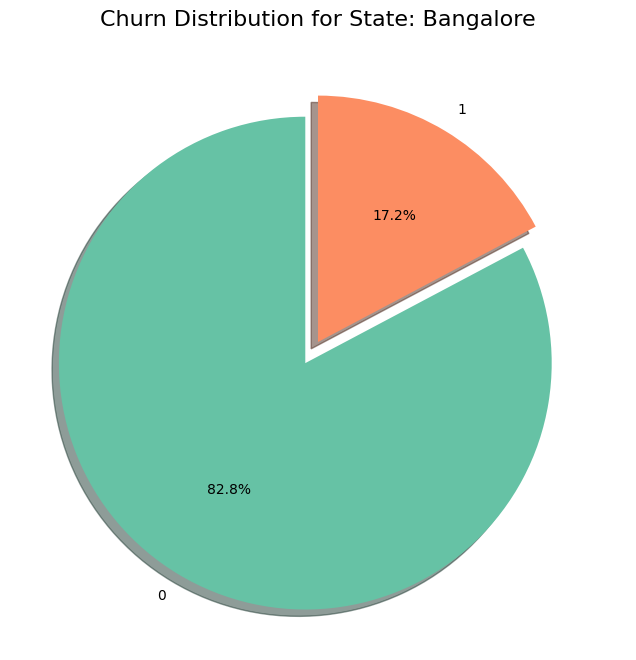

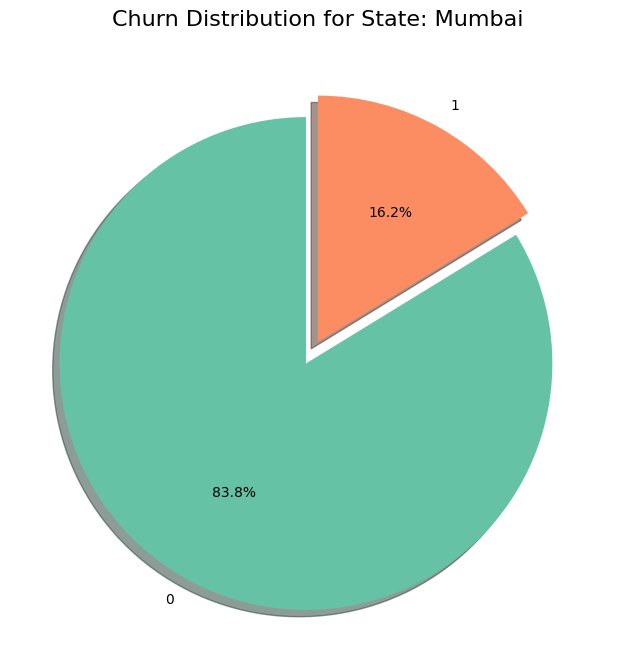

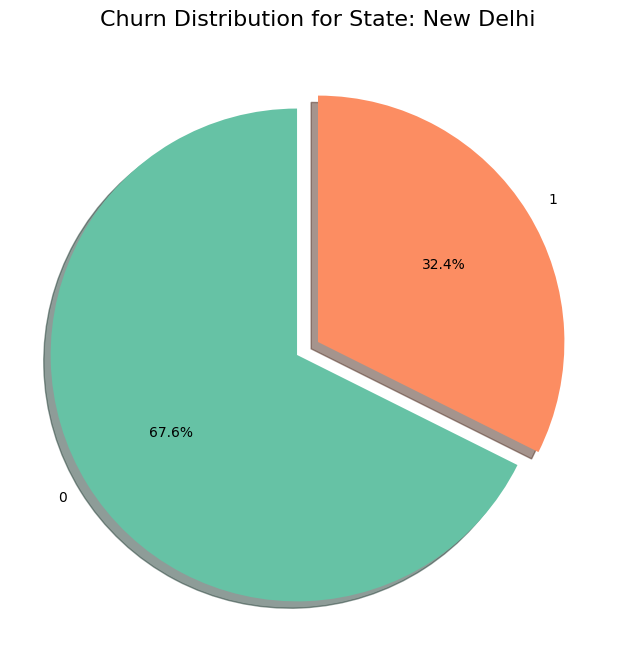

In [91]:
state_churn_counts = train_df.groupby('state')['churn'].value_counts().unstack()

for state in state_churn_counts.index:
    plt.figure(figsize=(8, 8))
    state_data = state_churn_counts.loc[state]
    colors = sns.color_palette("Set2", len(state_data))
    
    plt.pie(
        state_data,
        labels=state_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=(0.1, 0) if len(state_data) > 1 else (0, 0),
        shadow=True,
        textprops={'color': 'black'}
    )
    
    plt.title(f'Churn Distribution for State: {state}', fontsize=16)

In [92]:
train_df['active'].value_counts()

active
1    4102
0    3898
Name: count, dtype: int64

Text(0, 0.5, 'Count')

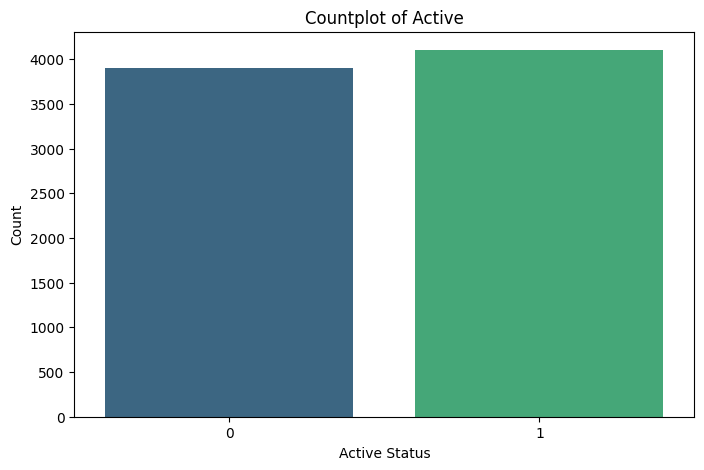

In [93]:
value_counts = train_df['active'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='active', palette='viridis')
plt.title('Countplot of Active')
plt.xlabel('Active Status')
plt.ylabel('Count')

(array([0, 1, 2]),
 [Text(0, 0, 'Mumbai'), Text(1, 0, 'Bangalore'), Text(2, 0, 'New Delhi')])

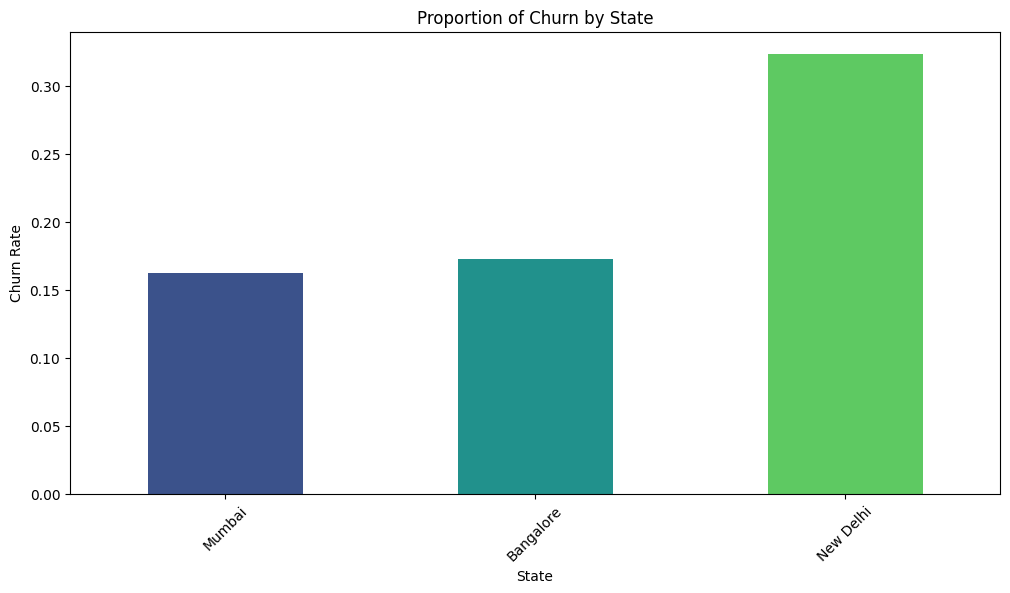

In [94]:
churn_proportion = train_df.groupby('state')['churn'].mean().sort_values()

palette = sns.color_palette("viridis", len(churn_proportion))

plt.figure(figsize=(12, 6))
churn_proportion.plot(kind='bar', color=palette)
plt.title('Proportion of Churn by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

<Axes: xlabel='churn', ylabel='count'>

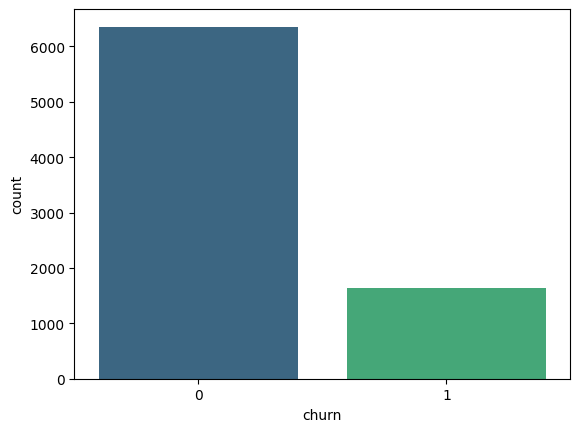

In [95]:
sns.countplot(x='churn',data=train_df,palette='viridis')

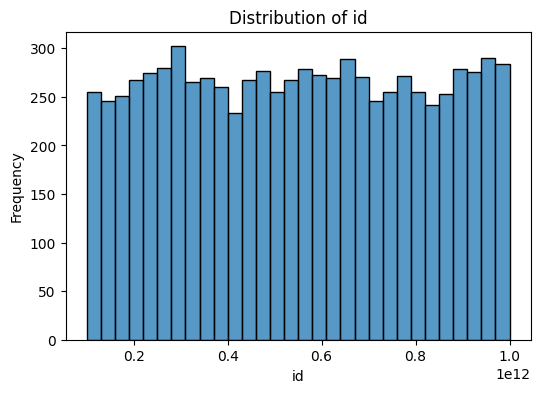

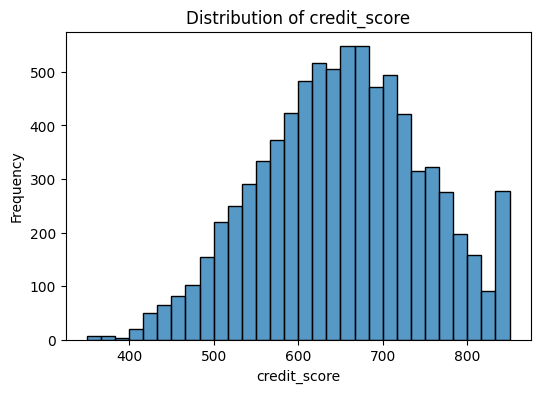

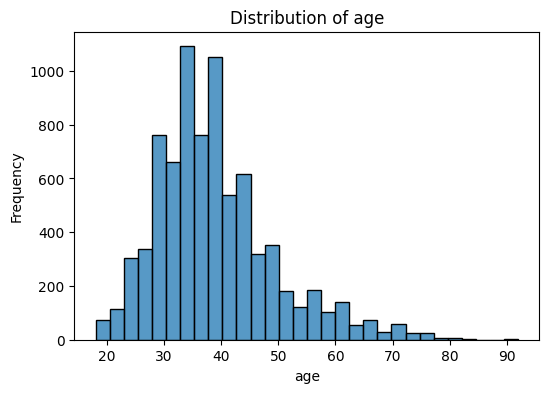

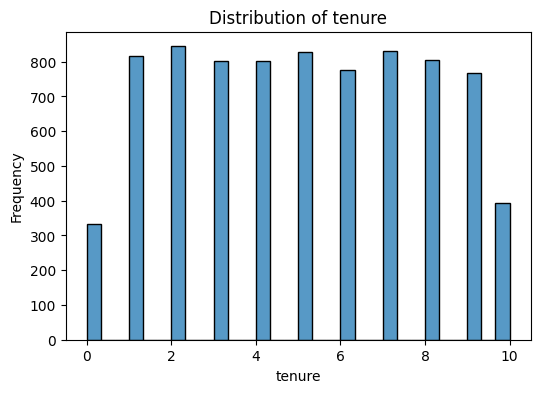

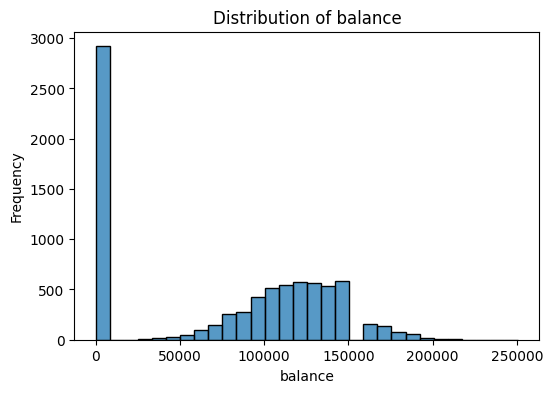

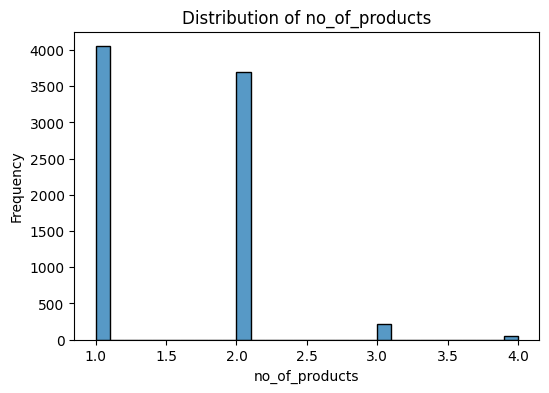

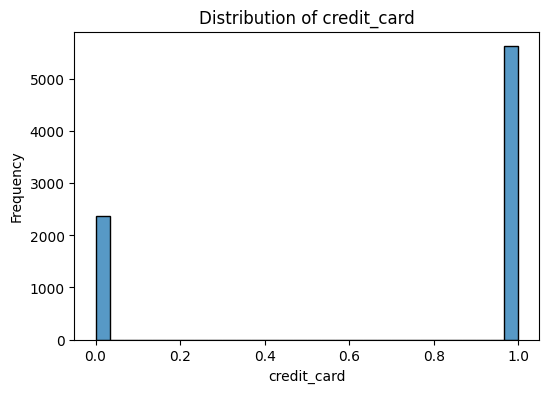

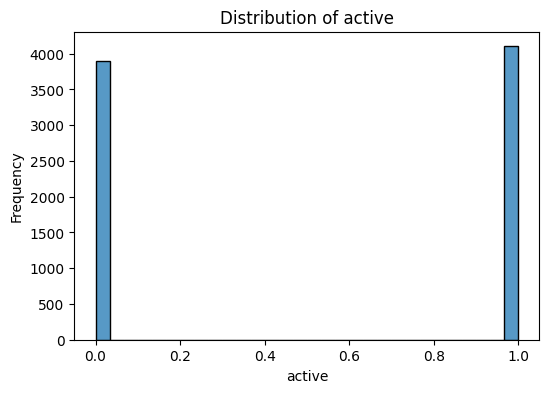

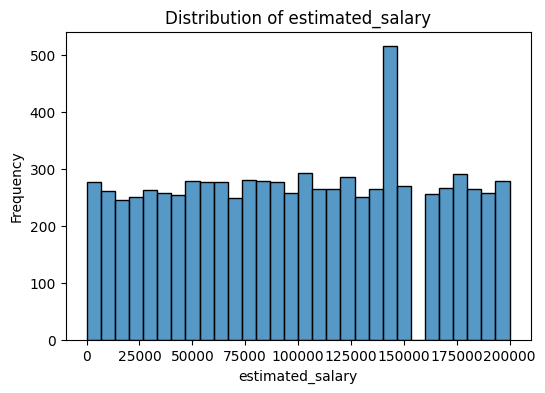

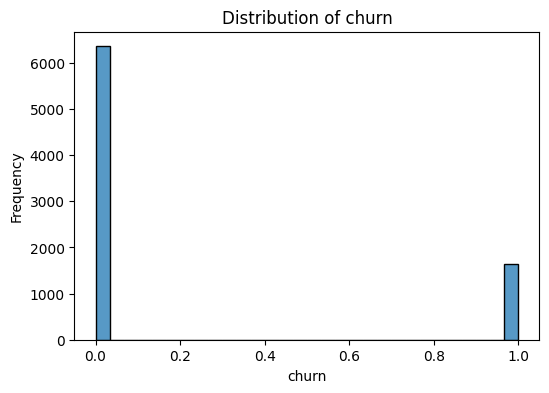

In [96]:
#Distribution Plot
numeric_columns = train_df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=False, bins=30, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

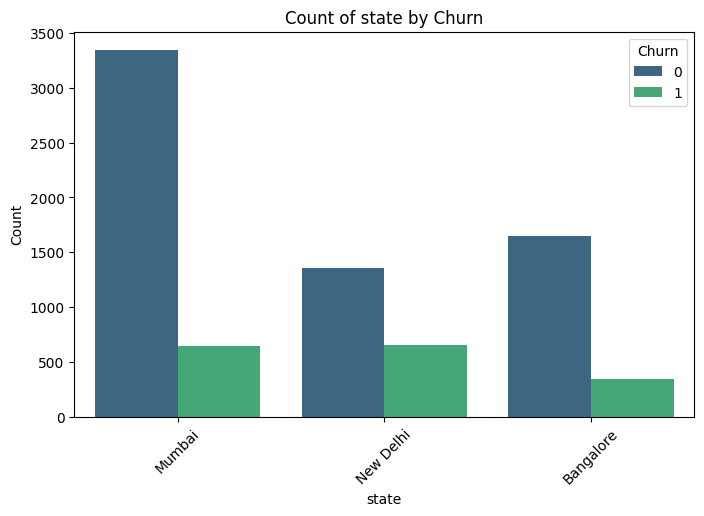

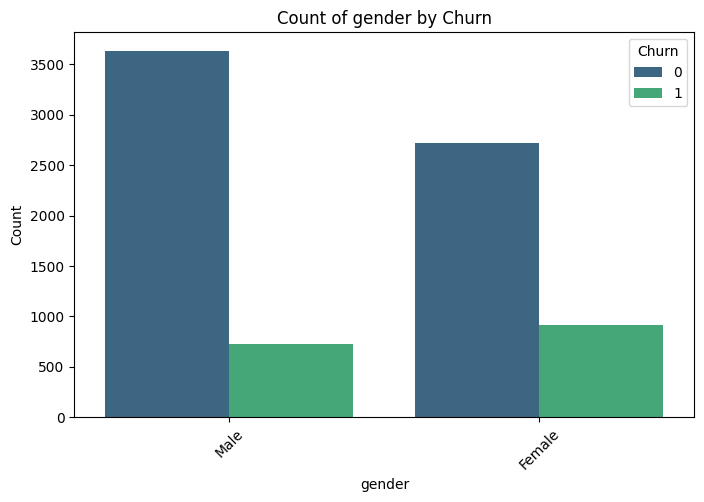

In [97]:
columns_to_plot = [col for col in train_df.columns if col != 'id' and col != 'churn']
categorical_columns = train_df[columns_to_plot].select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=col, hue='churn', palette='viridis')
    plt.title(f'Count of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

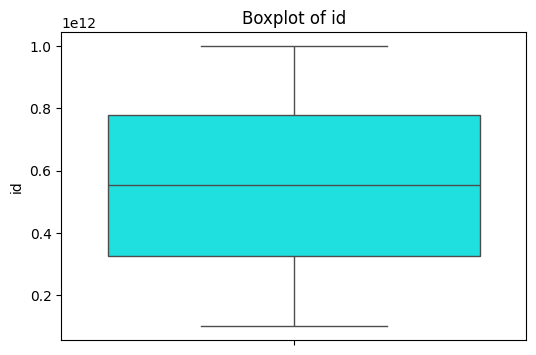

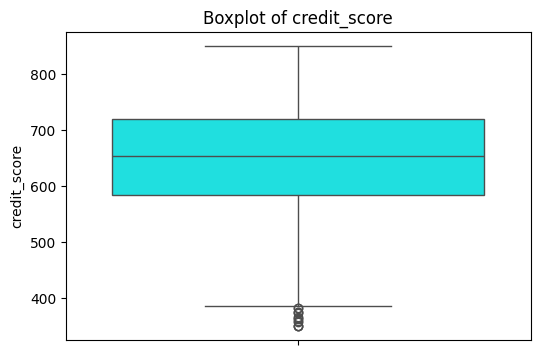

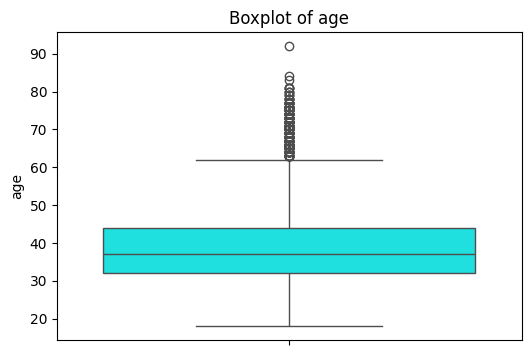

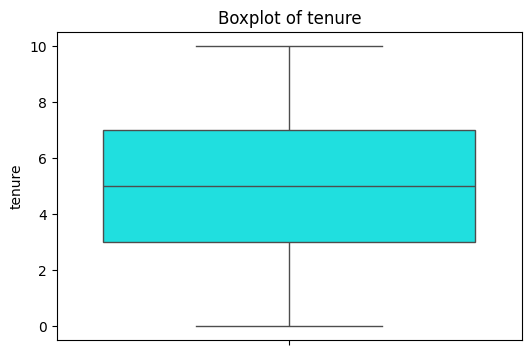

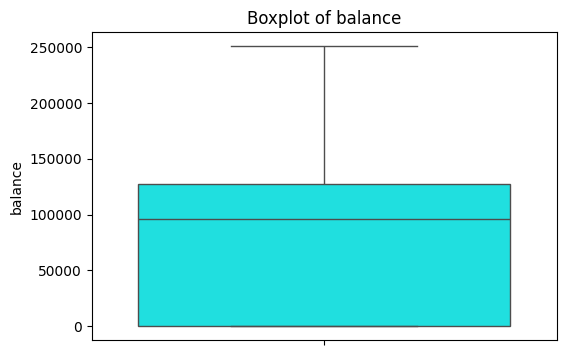

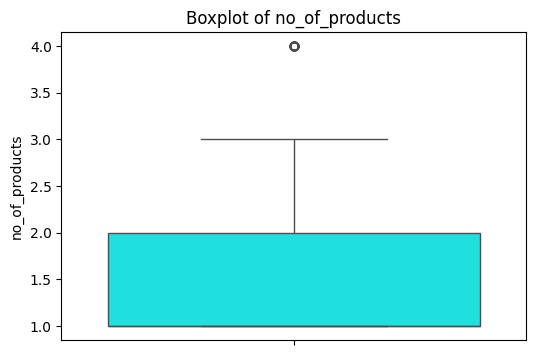

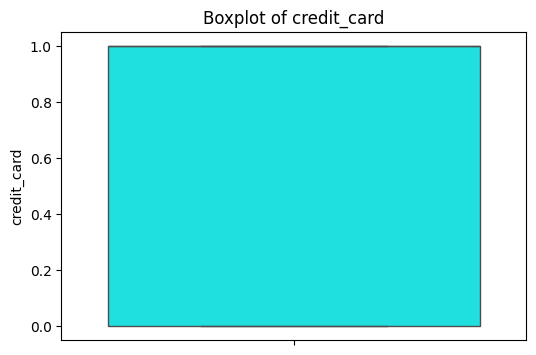

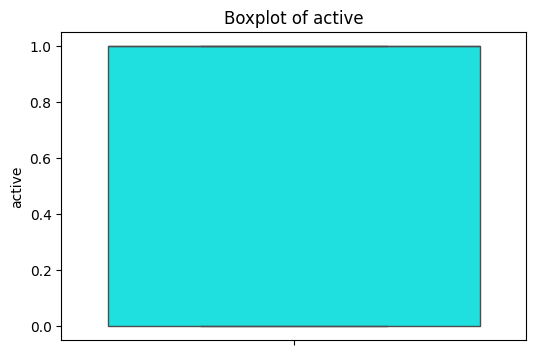

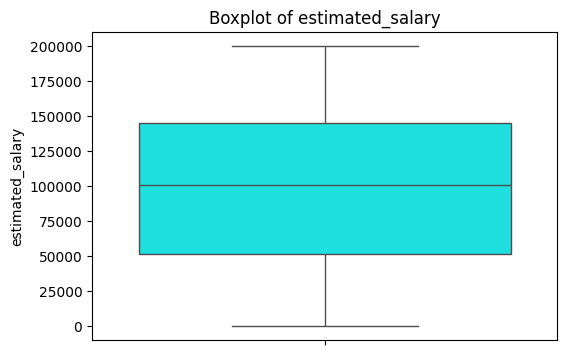

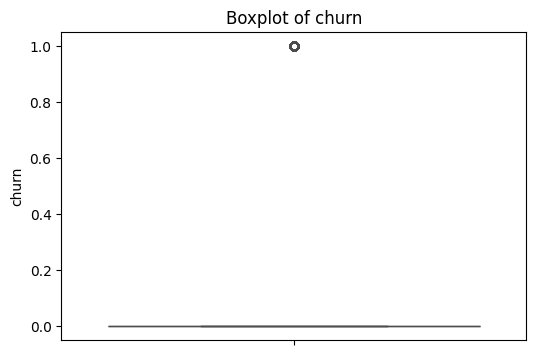

In [98]:
#Outlier Detection
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_df, y=col, color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

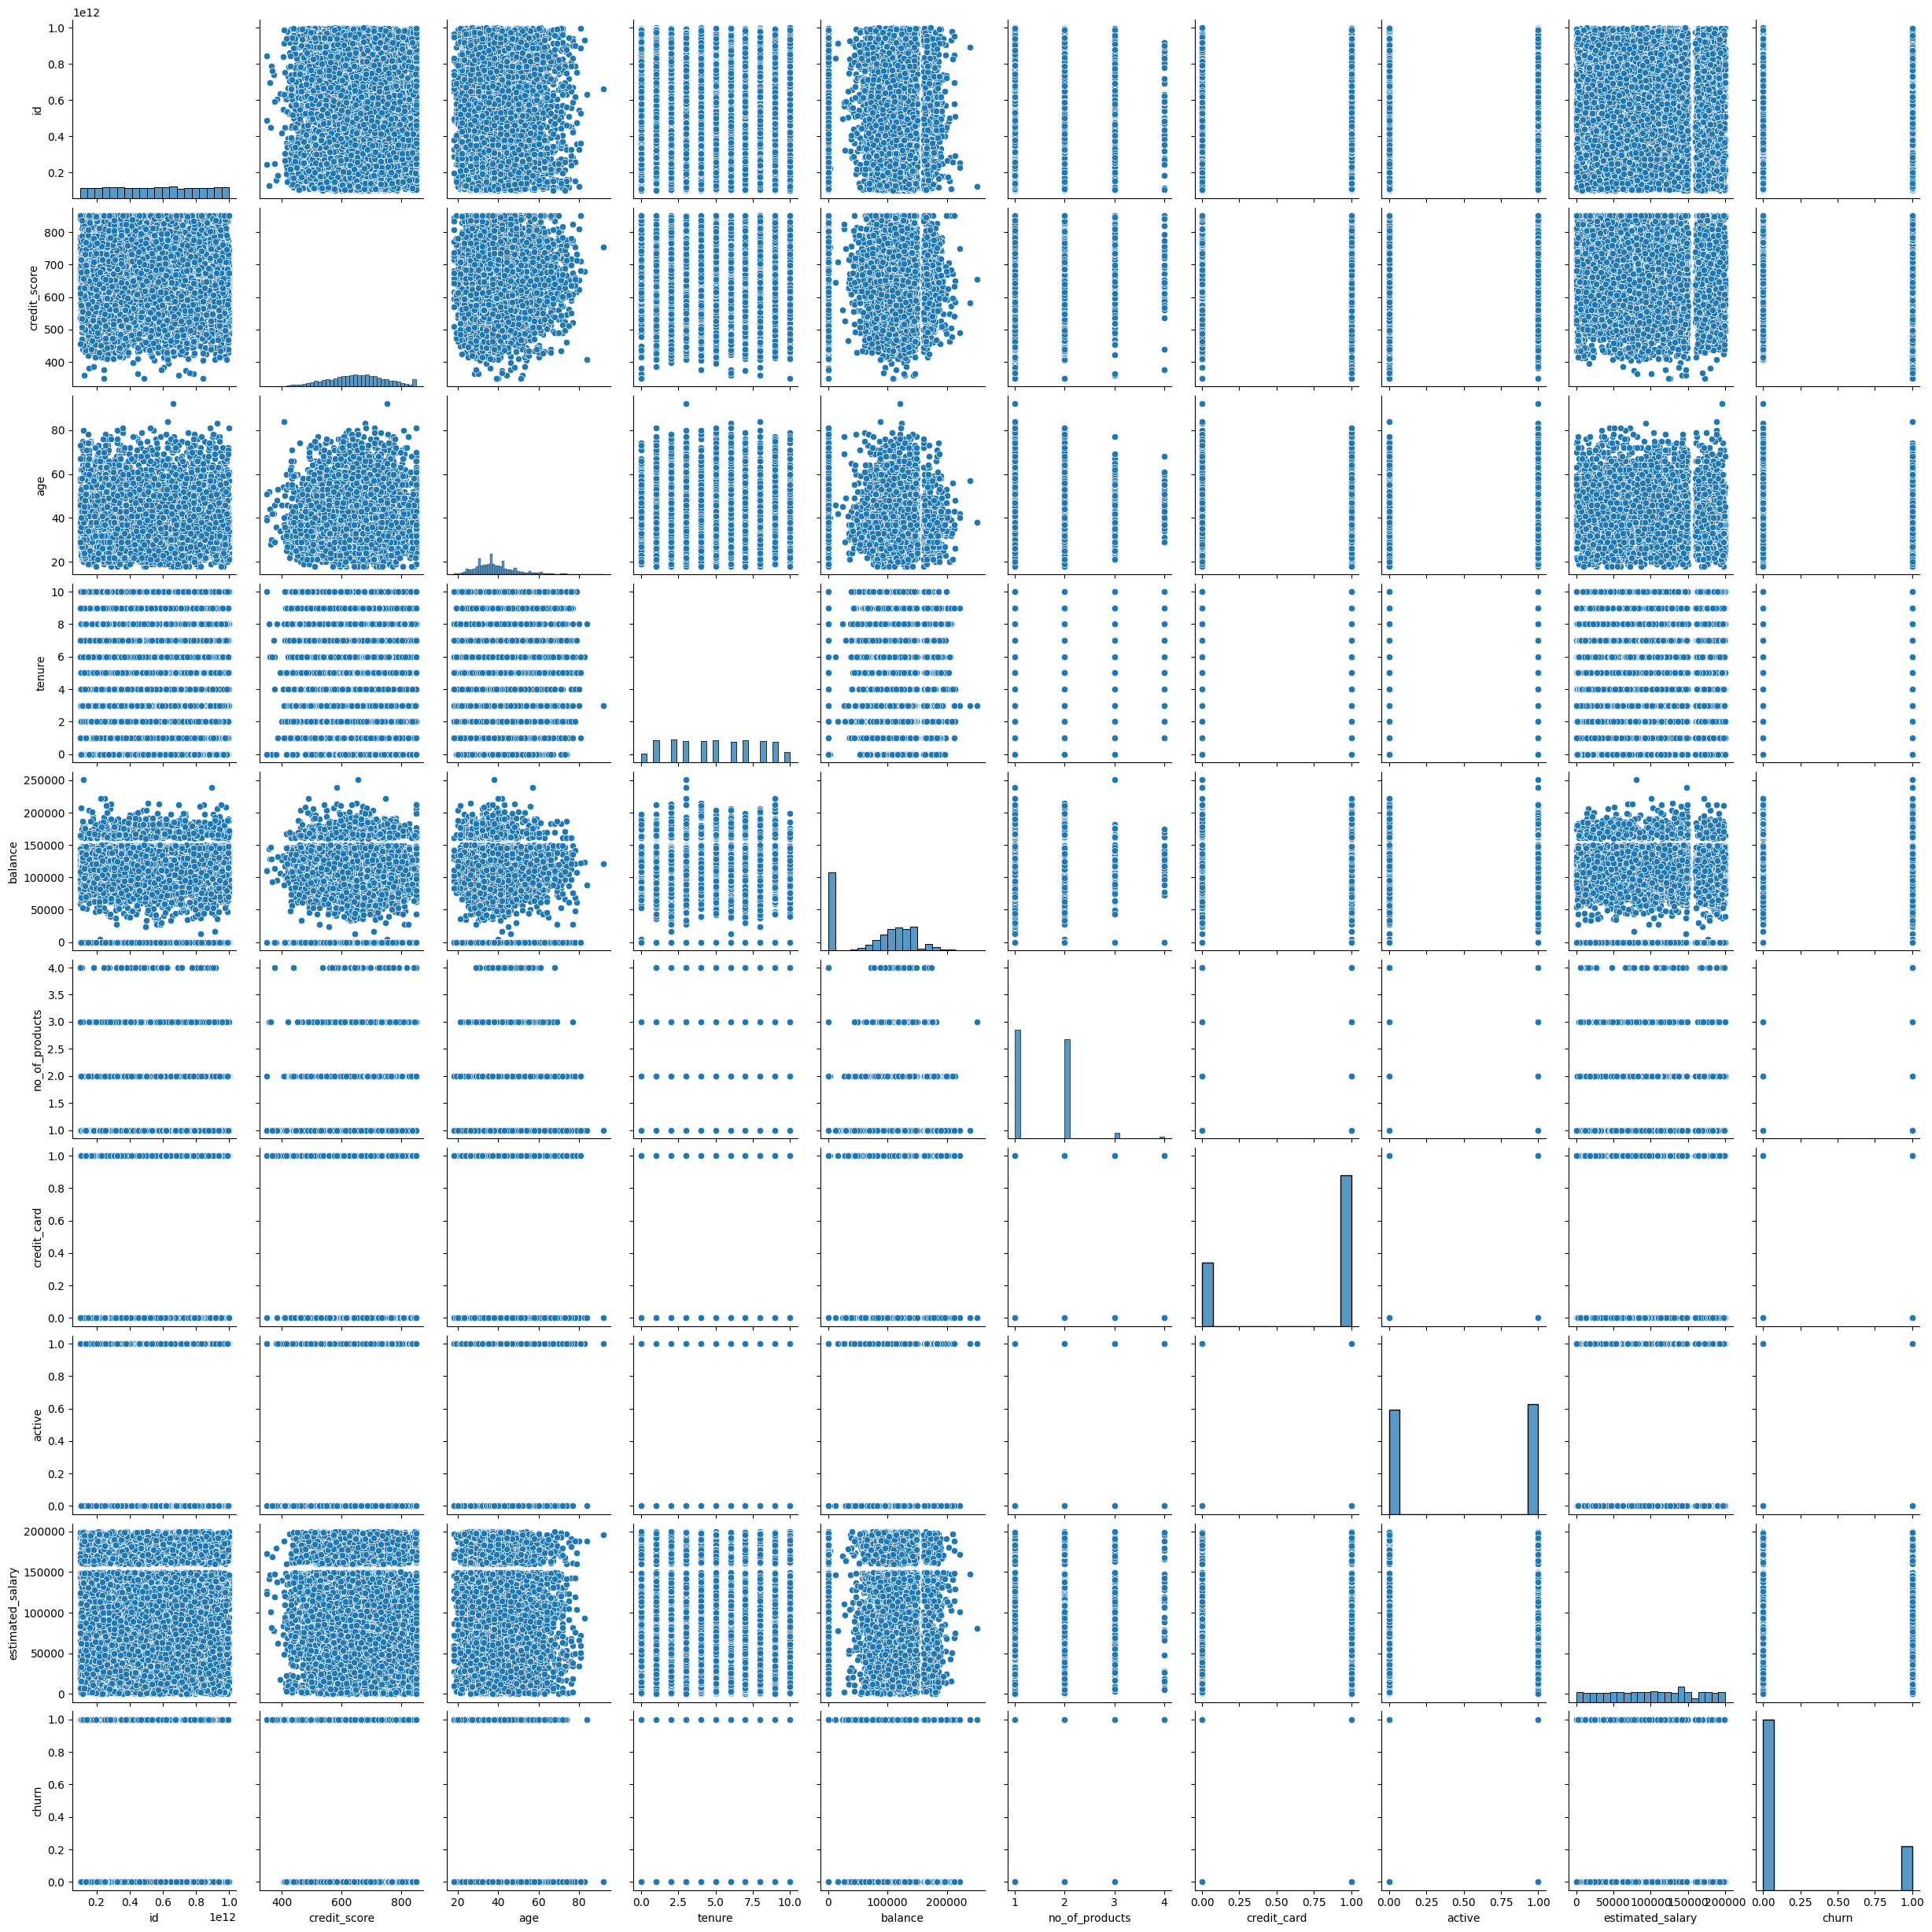

In [99]:
sns.pairplot(train_df)

In [100]:
train_df.drop('state',axis=1,inplace=True)

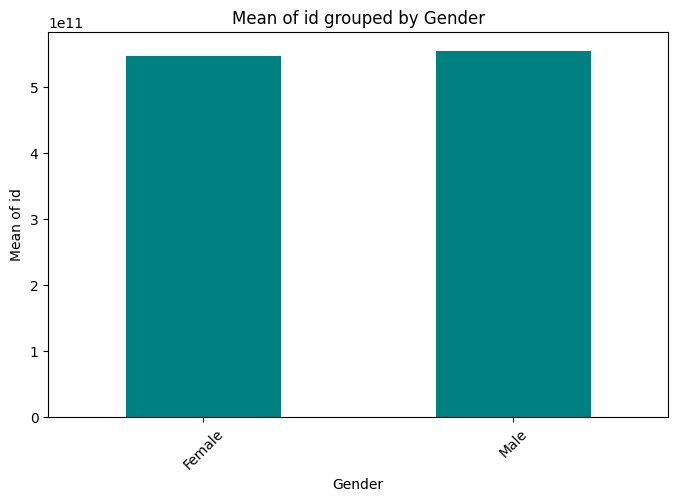

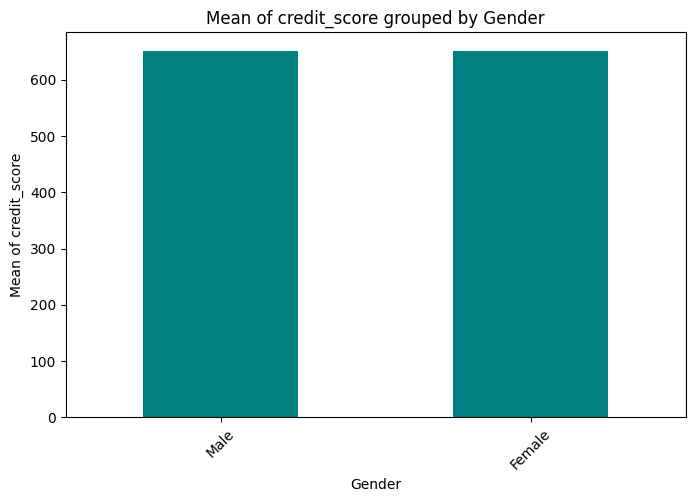

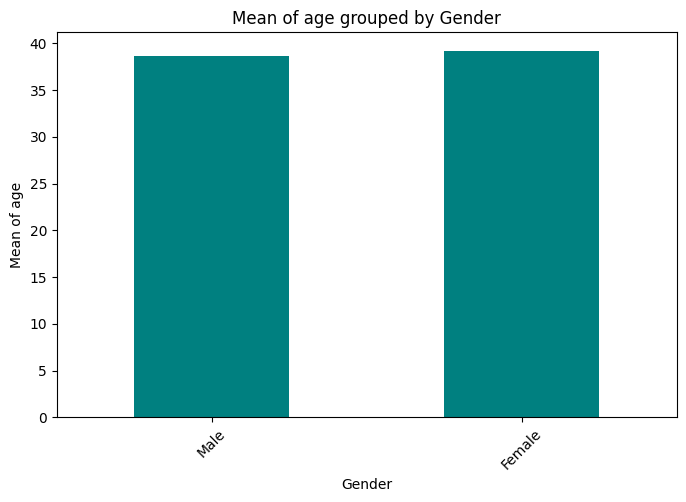

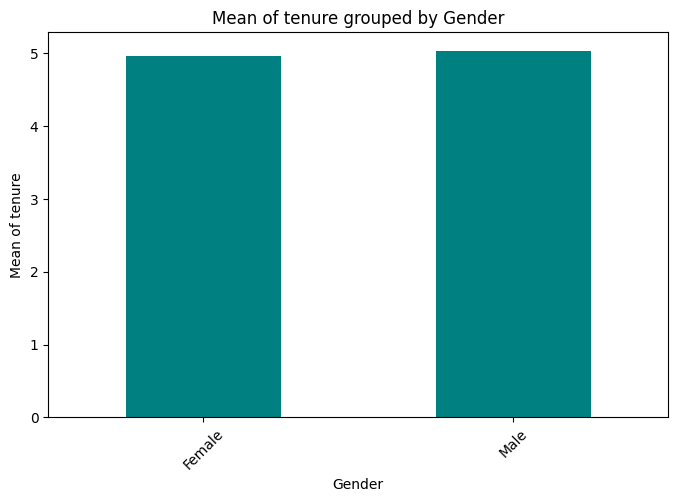

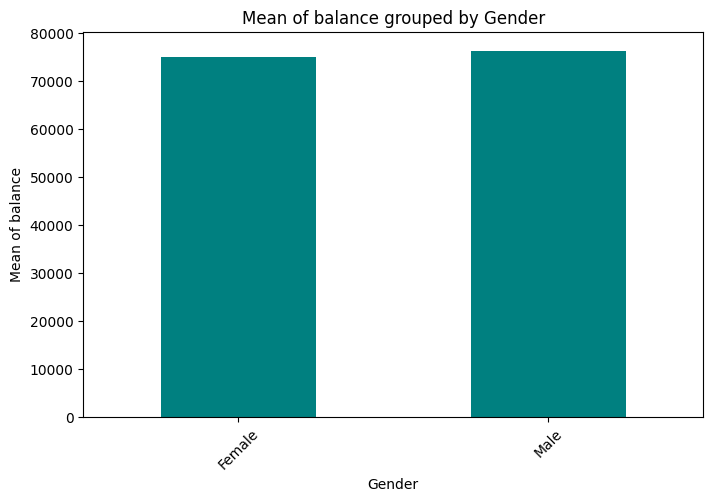

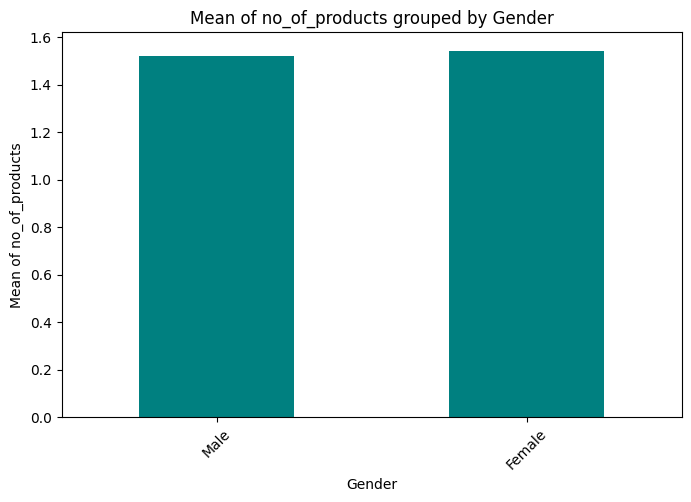

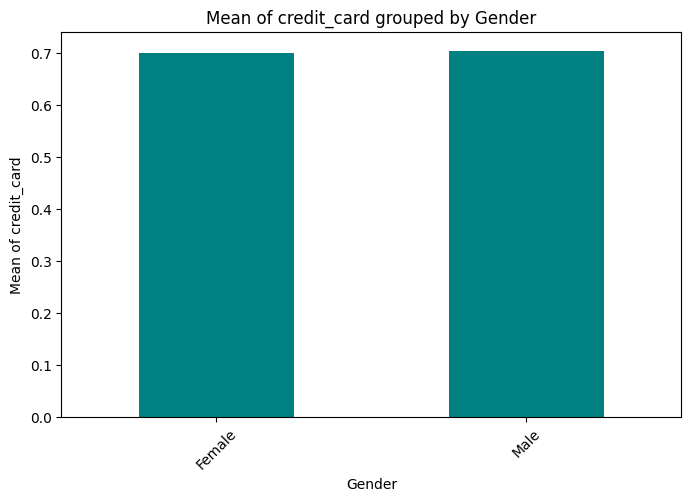

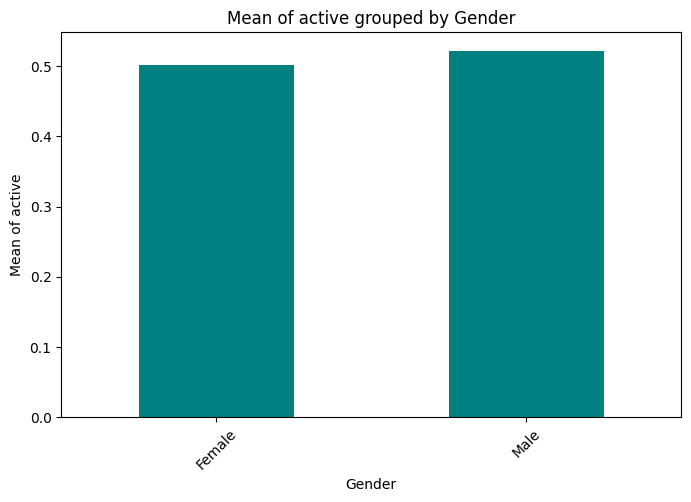

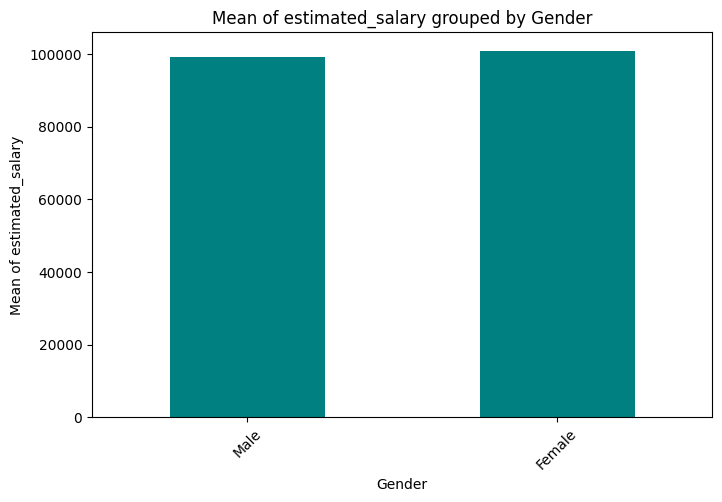

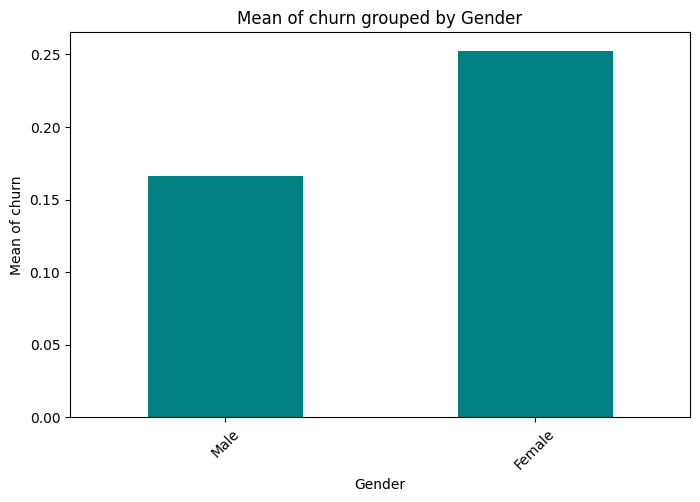

In [101]:
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    grouped_data = train_df.groupby('gender')[col].mean().sort_values()
    grouped_data.plot(kind='bar', color='teal')
    plt.title(f'Mean of {col} grouped by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'Mean of {col}')
    plt.xticks(rotation=45)

In [102]:
corr = train_df.corr(numeric_only=True)

In [103]:
corr

,id,credit_score,age,tenure,balance,no_of_products,credit_card,active,estimated_salary,churn
id,1.000000,-0.007321,-0.004017,-0.011929,-0.019694,0.008063,0.006841,0.008935,-0.005510,0.016048
credit_score,-0.007321,1.000000,-0.007257,-0.007671,0.006780,0.019397,-0.013156,0.028187,-0.002818,-0.029305
age,-0.004017,-0.007257,1.000000,-0.008788,0.028137,-0.033875,-0.020440,0.088123,-0.000486,0.283173
tenure,-0.011929,-0.007671,-0.008788,1.000000,-0.011912,0.018448,0.020439,-0.023162,0.021374,-0.013352
balance,-0.019694,0.006780,0.028137,-0.011912,1.000000,-0.298283,-0.015637,-0.021595,0.011907,0.119018
no_of_products,0.008063,0.019397,-0.033875,0.018448,-0.298283,1.000000,0.003504,0.019543,0.013236,-0.051009
credit_card,0.006841,-0.013156,-0.020440,0.020439,-0.015637,0.003504,1.000000,-0.011913,-0.012489,-0.006471
active,0.008935,0.028187,0.088123,-0.023162,-0.021595,0.019543,-0.011913,1.000000,-0.009340,-0.156560
estimated_salary,-0.005510,-0.002818,-0.000486,0.021374,0.011907,0.013236,-0.012489,-0.009340,1.000000,0.010700
churn,0.016048,-0.029305,0.283173,-0.013352,0.119018,-0.051009,-0.006471,-0.156560,0.010700,1.000000


<Axes: >

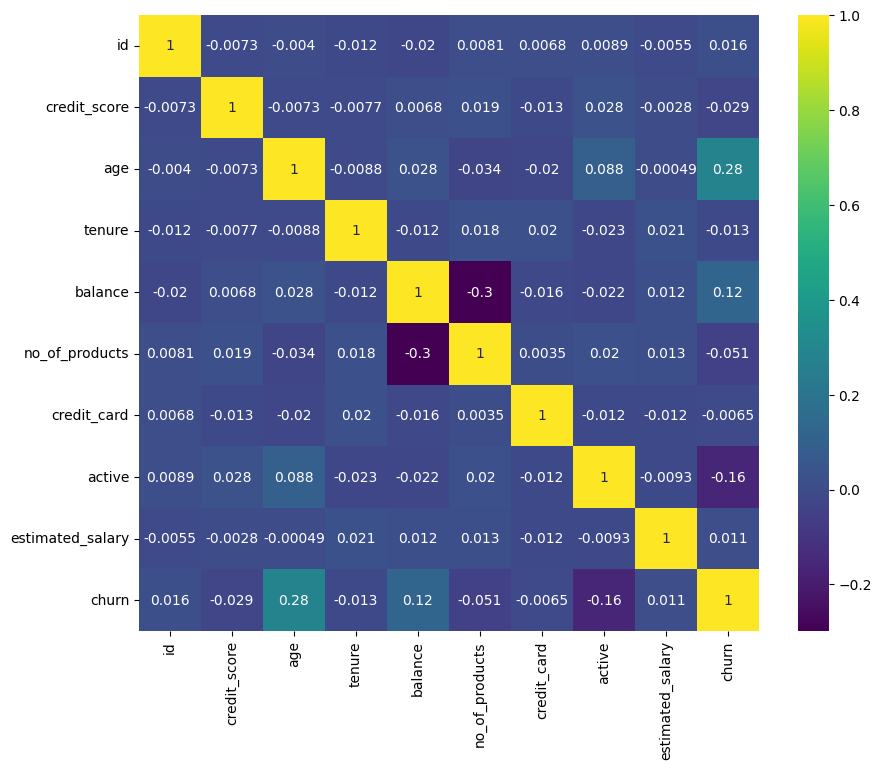

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='viridis',annot=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['gender'] = le.fit_transform(train_df['gender'])
test_df['gender'] = le.fit_transform(test_df['gender'])

In [6]:
test_df

,id,credit_score,state,gender,age,tenure,balance,no_of_products,credit_card,active,estimated_salary
0,771331655036,596,New Delhi,1,32,3,96709.07,2,0,0,41788.37
1,852192558875,623,Mumbai,1,43,1,0.00,2,1,1,146379.30
2,771857370540,601,Bangalore,0,44,4,0.00,2,1,0,58561.31
3,600149420838,506,New Delhi,1,59,8,119142.10,2,1,1,170679.74
4,921417924141,560,Bangalore,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...,...
1995,297941239548,602,New Delhi,0,53,5,98268.84,1,0,1,45038.29
1996,495351033832,609,Mumbai,1,25,10,0.00,1,0,1,109895.16
1997,735035704379,730,Mumbai,0,47,7,0.00,1,1,0,33373.26
1998,193569458042,692,Mumbai,1,29,4,0.00,1,1,0,76755.99


In [7]:
test_df.drop('state',axis=1,inplace=True)

In [8]:
train_majority = train_df[train_df['churn'] == 0]
train_minority = train_df[train_df['churn'] == 1]

In [9]:
from sklearn.utils import resample
train_minority_upsampled = resample(train_minority, 
                                    replace=True,    
                                    n_samples=len(train_majority), 
                                    random_state=42)

In [10]:
train_df_upsampled = pd.concat([train_majority, train_minority_upsampled])

In [111]:
print("Class distribution after upsampling:")
print(train_df_upsampled['churn'].value_counts())

Class distribution after upsampling:
churn
0    6356
1    6356
Name: count, dtype: int64


In [112]:
corr1 = train_df_upsampled.corr(numeric_only=True)

<Axes: >

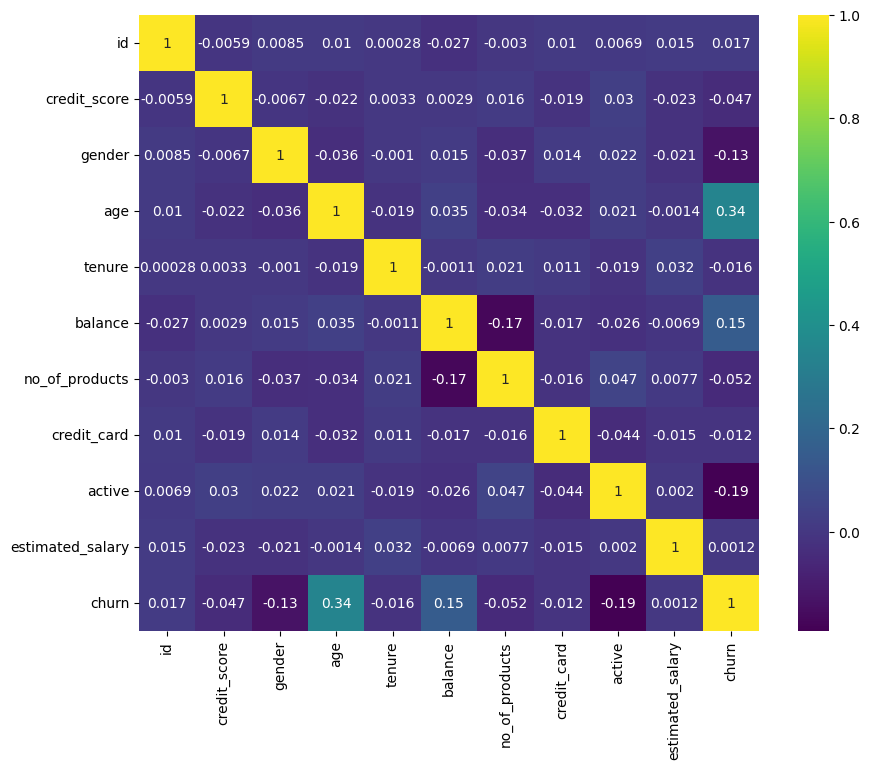

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1,cmap='viridis',annot=True)

In [114]:
X = train_df_upsampled.drop('churn', axis=1)
y = train_df_upsampled['churn']

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [118]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    

    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_val, y_pred))
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_val, y_pred))

Logistic Regression Accuracy: 0.7035
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1303
           1       0.70      0.69      0.70      1240

    accuracy                           0.70      2543
   macro avg       0.70      0.70      0.70      2543
weighted avg       0.70      0.70      0.70      2543

Confusion Matrix for Logistic Regression:

[[929 374]
 [380 860]]
Random Forest Accuracy: 0.9611
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1303
           1       0.94      0.98      0.96      1240

    accuracy                           0.96      2543
   macro avg       0.96      0.96      0.96      2543
weighted avg       0.96      0.96      0.96      2543

Confusion Matrix for Random Forest:

[[1226   77]
 [  22 1218]]
Support Vector Machine (SVM) Accuracy: 0.7884
Classificati

In [119]:
best_model = XGBClassifier()
best_model.fit(X_train_scaled, y_train)

y_val_pred = best_model.predict(X_val_scaled)
print(f"XGBoost Accuracy on validation data: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report for XGBoost:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix for XGBoost:\n", confusion_matrix(y_val, y_val_pred))

XGBoost Accuracy on validation data: 0.9056
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1303
           1       0.88      0.94      0.91      1240

    accuracy                           0.91      2543
   macro avg       0.91      0.91      0.91      2543
weighted avg       0.91      0.91      0.91      2543

Confusion Matrix for XGBoost:
 [[1137  166]
 [  74 1166]]


In [120]:
y_test_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"{best_model} Accuracy on validation data: {accuracy:.4f}")
print(f"Classification Report for {best_model}:\n")
print(classification_report(y_val, y_val_pred))
print(f"Confusion Matrix for {best_model}:\n")
print(confusion_matrix(y_val, y_val_pred))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) Accuracy on validation data: 0.9056
Classification Report for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_st

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from tqdm import tqdm

param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, scoring='accuracy', 
                                   n_jobs=-1, cv=5, verbose=0, random_state=42)

for _ in tqdm(range(1), desc="RandomizedSearchCV"):
    random_search.fit(X_train_scaled, y_train)

best_xgb = random_search.best_estimator_

y_val_pred = best_xgb.predict(X_val_scaled)
print(f"Best XGBoost Accuracy on validation data: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

y_test_pred = best_xgb.predict(X_test_scaled)

RandomizedSearchCV:   0%|          | 0/1 [00:00<?, ?it/s]/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:44:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:44:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:44:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:44:35] WA

Best XGBoost Accuracy on validation data: 0.9497
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1303
           1       0.92      0.98      0.95      1240

    accuracy                           0.95      2543
   macro avg       0.95      0.95      0.95      2543
weighted avg       0.95      0.95      0.95      2543

Confusion Matrix:
 [[1199  104]
 [  24 1216]]


In [122]:
submission = pd.DataFrame({
    'id': test_df['id'],  
    'churn': y_test_pred
})

submission.to_csv('churn_predictions1.csv', index=False)

print("Predictions have been saved to 'churn_predictions.csv'")

Predictions have been saved to 'churn_predictions.csv'
